# Introduction to Project

This is credit modeling project. Fit and predict one's income based on various indicators

## Importing the dataset
[Dataset Here](https://datahub.io/machine-learning/adult#resource-adult)
[About the Dataset](https://archive.ics.uci.edu/ml/datasets/Adult)
Please store in the same working director as your jupyter notebook.


In [2]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

In [3]:
# seaborn custom paramenters for uniformity
from matplotlib import rcParams
import matplotlib.pyplot as plt
import matplotlib as mpl

## Columns/Features of Dataset

In [4]:
# import the file path and import csv to dataframe
file = 'adult.csv'
df = pd.read_csv(file)

# get the column names and count
columns = df.columns; columns_list= columns.tolist()
num_columns = columns.nunique(); print("Number of columns:", num_columns, "\n", columns_list)

Number of columns: 15 
 ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capitalgain', 'capitalloss', 'hoursperweek', 'native-country', 'class']


In [5]:
# preview the data fields
preview = df.head(1); print(preview, "\n")

   age  workclass  fnlwgt  education  education-num marital-status  \
0    2  State-gov   77516  Bachelors             13  Never-married   

     occupation   relationship   race   sex  capitalgain  capitalloss  \
0  Adm-clerical  Not-in-family  White  Male            1            0   

   hoursperweek native-country  class  
0             2  United-States  <=50K   



## Dataset Metadata

In [6]:
# the data type of each of the columns
variable_types = df.dtypes.to_dict()
print(variable_types)

{'age': dtype('int64'), 'workclass': dtype('O'), 'fnlwgt': dtype('int64'), 'education': dtype('O'), 'education-num': dtype('int64'), 'marital-status': dtype('O'), 'occupation': dtype('O'), 'relationship': dtype('O'), 'race': dtype('O'), 'sex': dtype('O'), 'capitalgain': dtype('int64'), 'capitalloss': dtype('int64'), 'hoursperweek': dtype('int64'), 'native-country': dtype('O'), 'class': dtype('O')}


## Column Overviews

In [7]:
for x in columns_list:
    print(x) # print column name
    variable_categories = df[x].unique(); print(variable_categories, "\n")

age
[2 3 1 0 4] 

workclass
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' nan
 'Self-emp-inc' 'Without-pay' 'Never-worked'] 

fnlwgt
[ 77516  83311 215646 ... 173449  89686 350977] 

education
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th'] 

education-num
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8] 

marital-status
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed'] 

occupation
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' nan
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv'] 

relationship
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative'] 

race
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Ot

# Inspecting the outcome: "class"
String variables will have to be mapped into a numeric character using the <code>df.replace([old list],[new list])</code>

In [8]:
df2 = df # created a copy of df
df2.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
0,2,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,2,United-States,<=50K
1,3,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,0,United-States,<=50K
2,2,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,2,United-States,<=50K


#### Sector and Pay:
The people in the dataset make less than $50k a year with a majority or responses working in the private sector. Upon closer inspection of "workclass", there is a category of never worked

<AxesSubplot:xlabel='class', ylabel='count'>

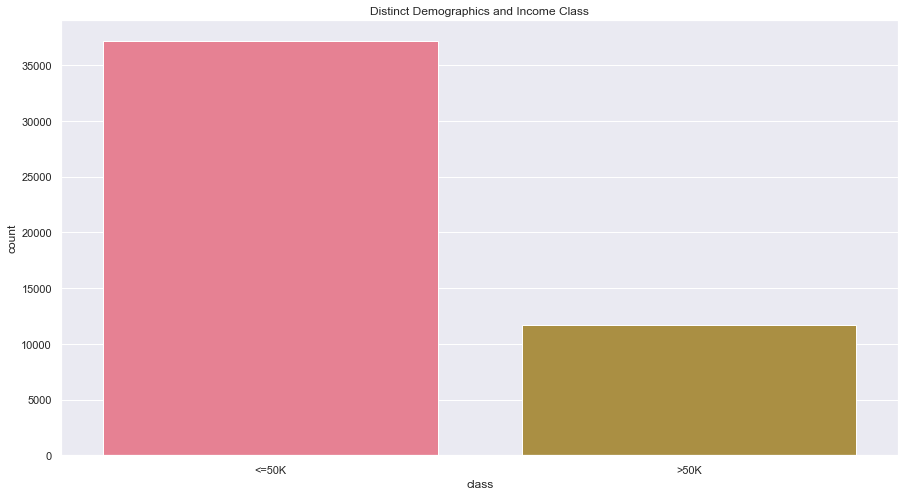

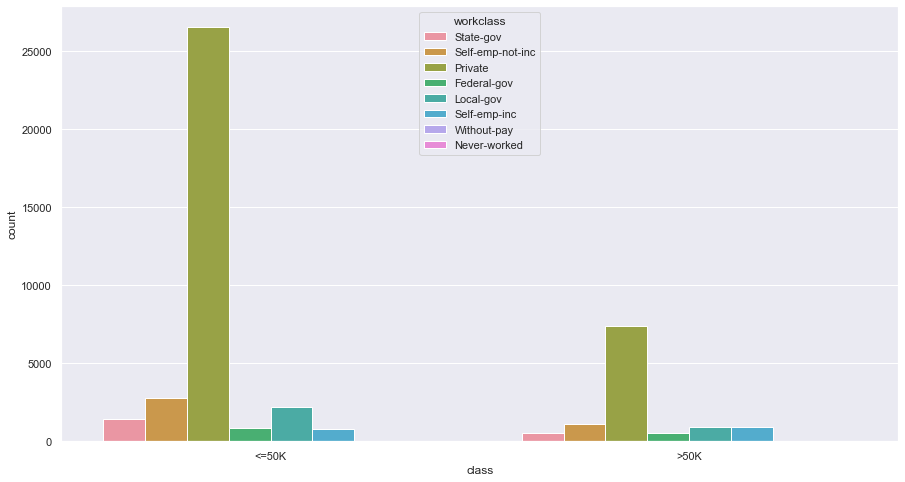

In [9]:
# look at the frequency of each class in y
rcParams['figure.figsize'] = 15,8
sns.set_theme(style = "darkgrid", palette= "husl")
plt.title("Distinct Demographics and Income Class")
sns.countplot(x="class", data = df2)
plt.figure(2)
sns.countplot(x="class", data = df2, hue = "workclass")

#### Education and Income

<AxesSubplot:xlabel='class', ylabel='count'>

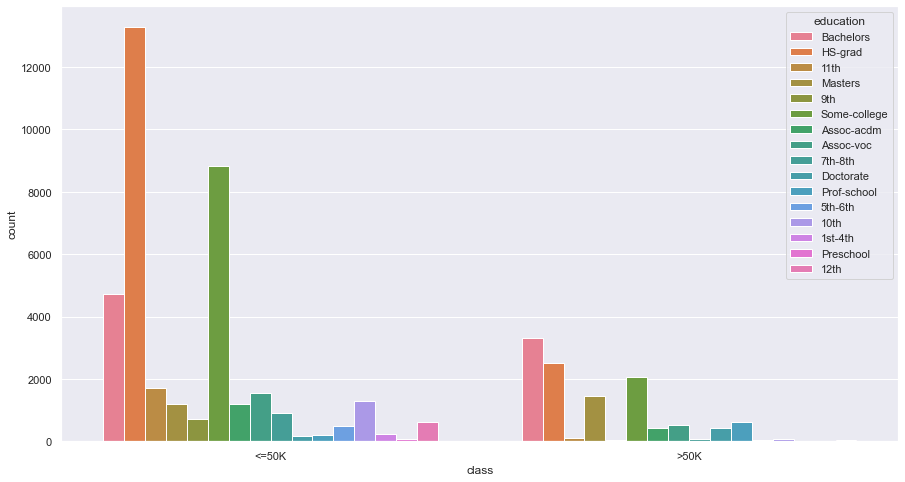

In [10]:
rcParams['figure.figsize'] = 15,8
sns.set_theme(style = "darkgrid")
sns.countplot(x="class", data = df2, hue = "education", palette= "husl")

#### Discriminatory Factors: Sex, Race, and Native Country

<AxesSubplot:xlabel='class', ylabel='count'>

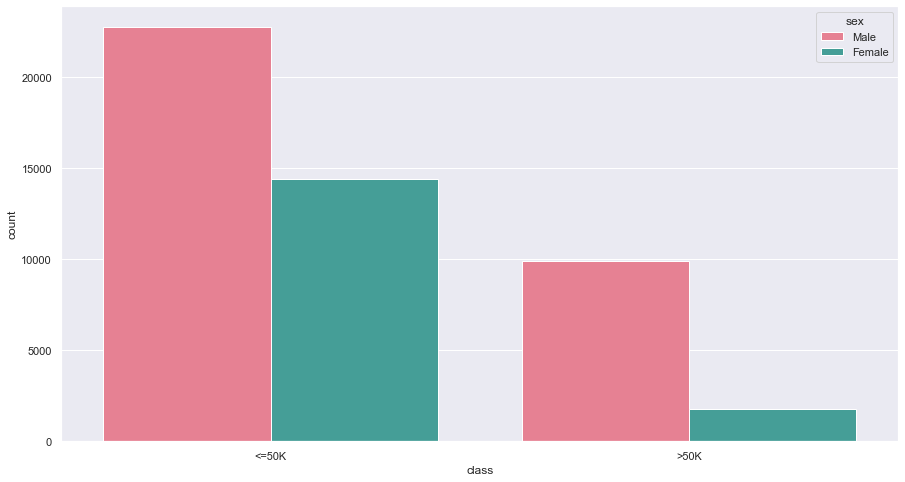

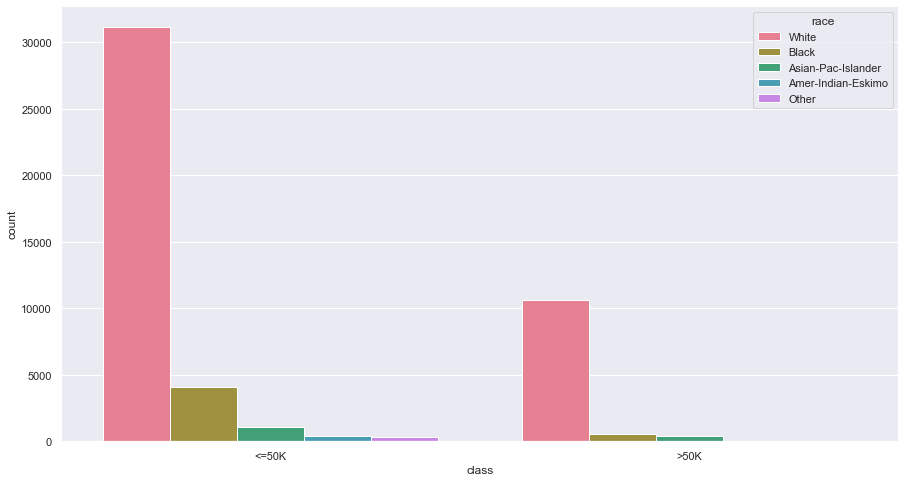

In [11]:
rcParams['figure.figsize'] = 15,8
sns.set_theme(style = "darkgrid")
sns.countplot(x="class", data = df2, hue = "sex", palette= "husl")
plt.figure(2)
sns.countplot(x="class", data = df2, hue = "race", palette= "husl")
# native country

## Siyayi Block

<AxesSubplot:xlabel='class', ylabel='count'>

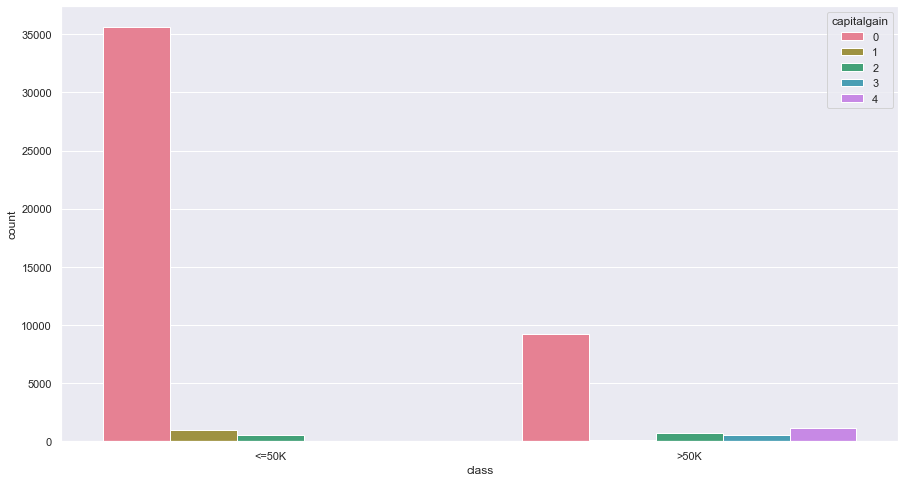

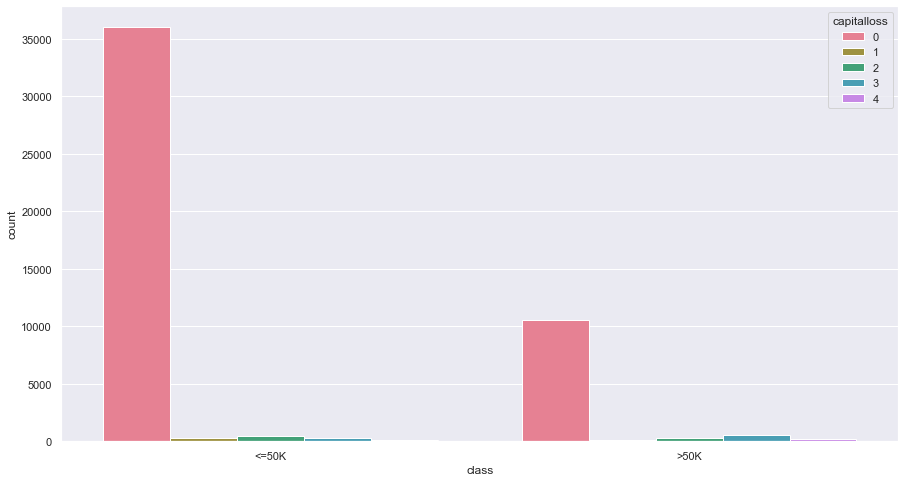

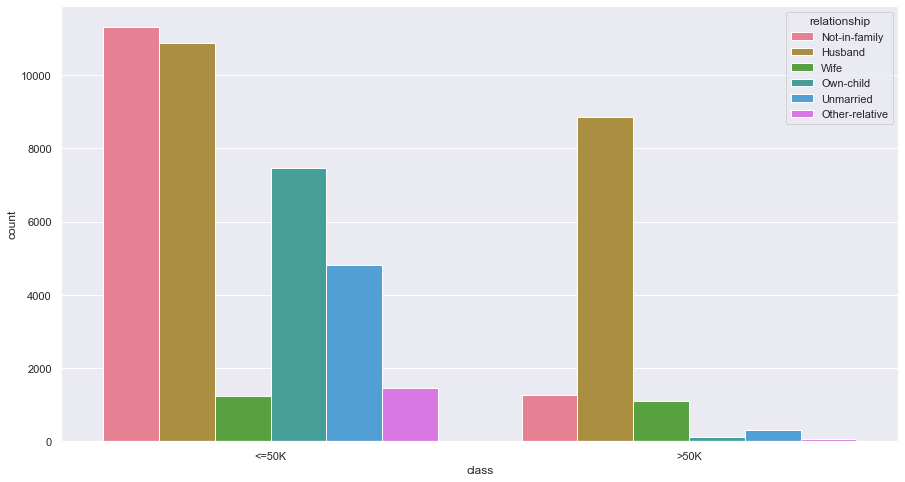

In [12]:
plt.figure(5)
sns.countplot(x="class", data = df2, hue = "capitalgain", palette= "husl")
plt.figure(6)
sns.countplot(x="class", data = df2, hue = "capitalloss", palette= "husl")
plt.figure(7)
sns.countplot(x="class", data = df2, hue = "relationship", palette= "husl")

<AxesSubplot:xlabel='class', ylabel='count'>

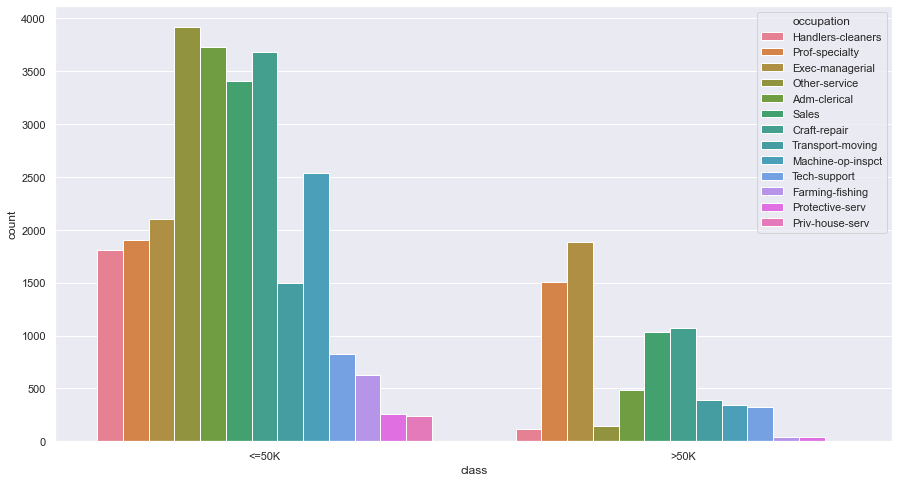

In [16]:
# create a new dataframe
private_workclass = df2[df['workclass'] == 'Private'] # syntax which is logically equivalent to use a dataframe, selecting a column from data frame and filtering the value
private_workclass.head()
sns.countplot(x="class", data = private_workclass, hue = "occupation", palette= "husl")

## Data Cleaning and Combining

### Capital Gains and Capitals Loss vs Class

### Private Workforce Categories

### Education Categories:
* Did not graduate high school
* Some college
* Associate Voca and Associate Adcm
* Bachelors
* Masters and Doctors
* Professional School